# 5.2 - 02 SHAP Importance 

In the next section of work we look at using the SHAP package to analyse the importance of variables


In [ ]:
import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
df = pd.read_csv("data/complete_with_features.csv")
embeddings = "Embeddings_bert-base-uncased.npy"

In [ ]:
def expand_array_col(df, col_name):
    expanded = df[col_name].apply(pd.Series)
    expanded.columns = [f'{col_name}_{i+1}' for i in range(expanded.shape[1])]
    df_expanded = pd.concat([df.drop(col_name, axis=1), expanded], axis=1)
    return df_expanded, expanded.columns

embs = np.load(embeddings, allow_pickle=True,)
df["embedding"] = list(embs)
newdf, cols = expand_array_col(df, "embedding")

In [ ]:
test = newdf[newdf["RANDOM"]>=0.8]
X_test = test.loc[:,cols]
y_test = test.loc[:,"generated"]


In [ ]:
filename = 'xt_BERT_model.pkl'
xt_model = pickle.load(open(filename, 'rb'))

In [ ]:
explainer = shap.TreeExplainer(xt_model)
shap_values = explainer.shap_values(X_test)

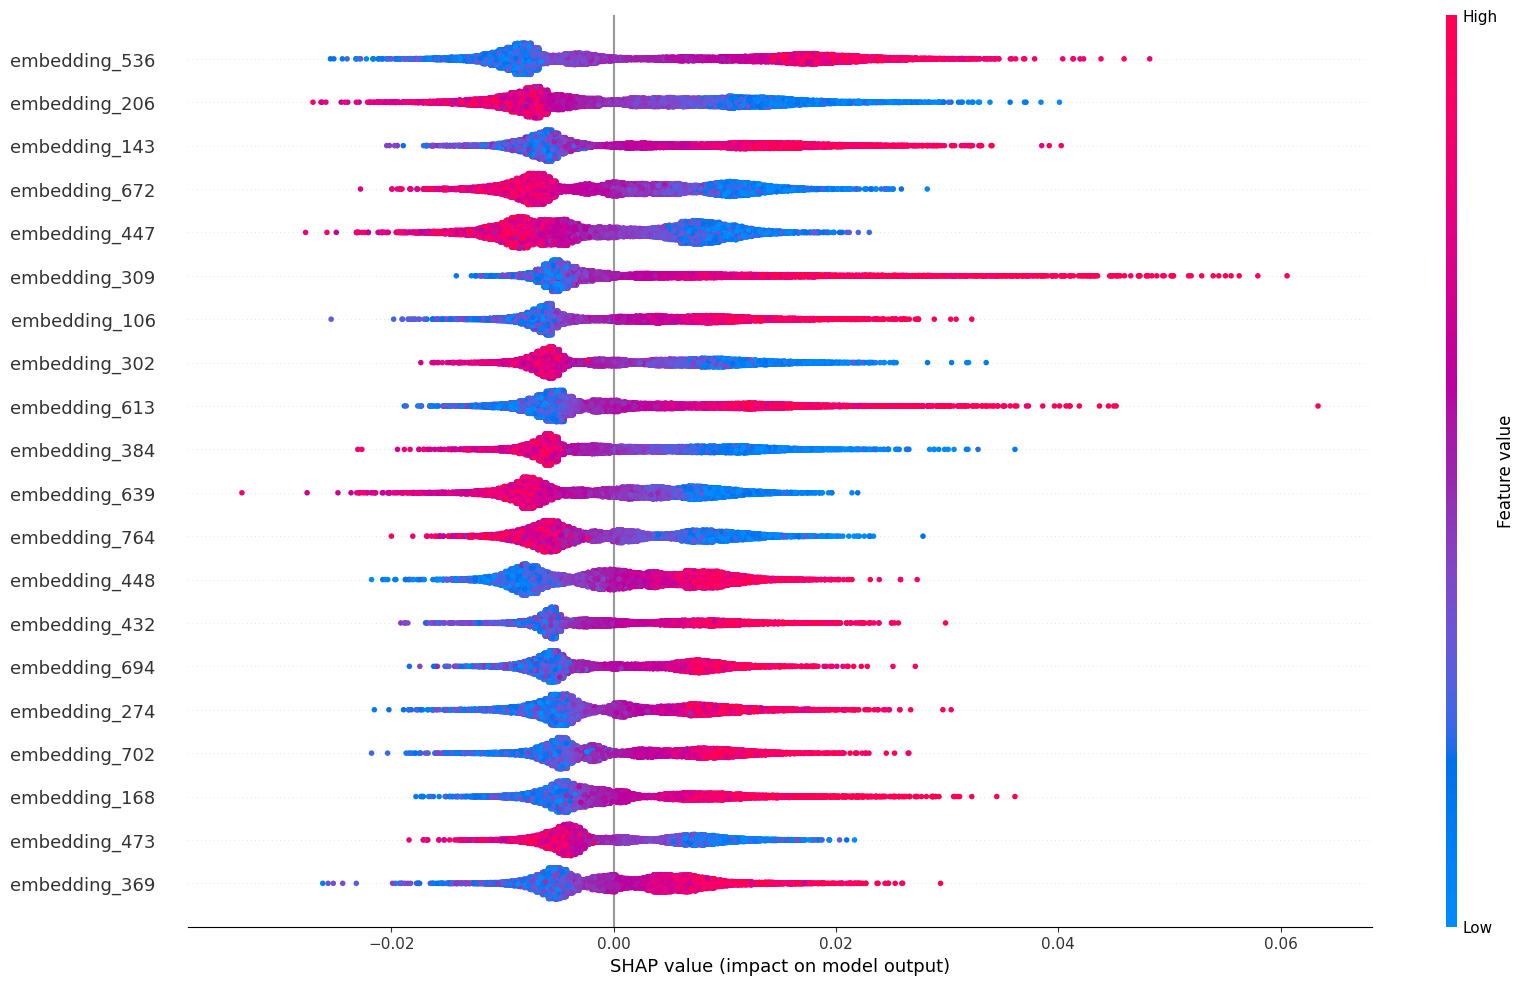

In [7]:
feat_names = list(cols)
shap_values_0 = shap_values[:,:,0]
shap_values_1 = shap_values[:,:,1]
shap.summary_plot(shap_values_1, X_test, feature_names=feat_names, show=False)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

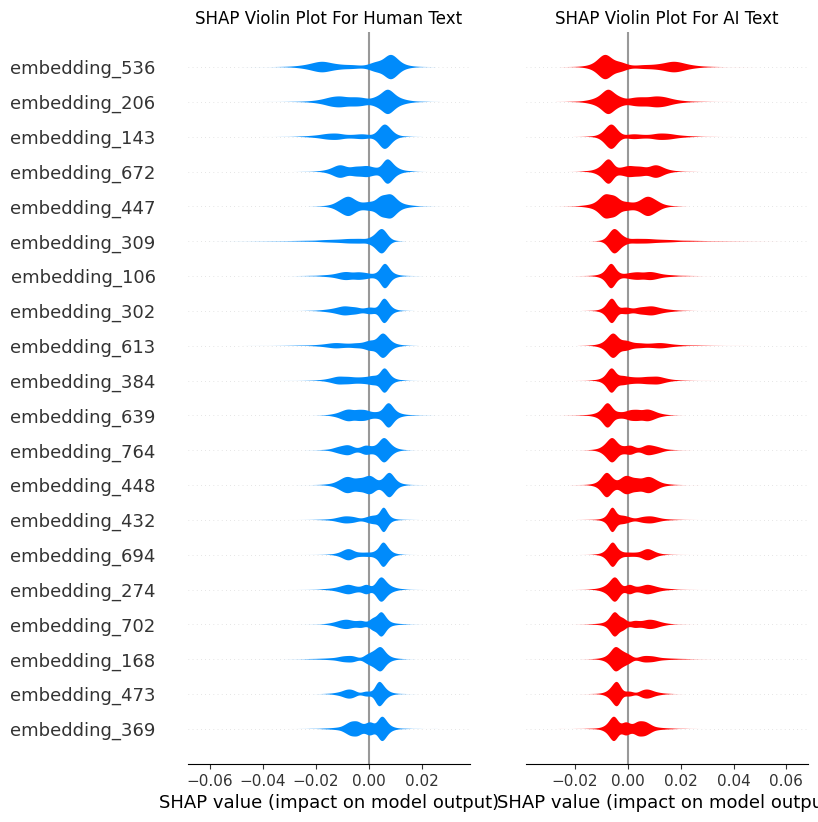

In [10]:
### ALTERNATIVE
## VIOLIN PLOTS SIDE BY SIDE

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
shap.plots.violin(shap_values_0, feature_names=feat_names, show=False)
plt.gca().set_title('SHAP Violin Plot For Human Text')
plt.subplot(1,2,2)
shap.plots.violin(shap_values_1, feature_names=feat_names, color="red", show=False)
plt.gca().set_title('SHAP Violin Plot For AI Text')
plt.gca().set_yticklabels([])
plt.show()